Code permettant de réaliser un filtre de Kalman et un lissage de Kalman pour 
différente valeur prise de R et Q puis de calculer la métrique, la log-vraisemblance
et la coverage probility pour ces différentes valeurs prises.

Dans cette partie on défini les données et on génère les observations et l'état du système à partir de R et Q

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time 

np.random.seed(5)

# Données 
T=1000 #Nombre d'itération 
Q_true=1
R_true=1
N=100 # Nombre de valeurs différentes de R et Q qui vont être prise
RMSE=np.zeros((N,N)) # Matrice stockant les métriques 
LL=np.zeros((N,N)) # Matrice stockant les log-vraisemblance
CP=np.zeros((N,N)) # Matrice stockant les coverage probability

#Generate true state and noisy observation 
x_true=np.zeros(T)
y=np.zeros(T)
for t in range(T):
    x_true[t]=0.95*x_true[t-1]+np.random.normal(0,Q_true)
    y[t]=x_true[t]+np.random.normal(0,R_true)
        

On crée un vecteur possédant un nombre N de valeurs de R différentes et un pour Q puis on va appliquer le filtre de Kalman et le lissage de Kalman à chacune d'entre elle

In [2]:
#Vecteurs regroupant les variations de R et Q 
R_var=np.linspace(0.1,10,N)
Q_var=np.linspace(0.1,10,N)

# Calcul du temps d'execution 
t1=time.time()

#Double boucle sur les variations de R et Q 
for r in range(N):
    for q in range(N):
        
        # Kalman filter
        
        #Initial condition
        xb=x_true[0]
        B=1
        
        #Filter Parameters
        M=0.95
        Q=Q_var[q]
        H=1
        R=R_var[r]
        
        # Kalman filter (forward)
        xf=np.zeros(T);Pf=np.zeros(T);xa=np.zeros(T);Pa=np.zeros(T)
        for t in range(T):
            if t==0:
                xf[t]=xb
                Pf[t]=B
            else:
                xf[t]=M*xa[t-1]
                Pf[t]=M**2*Pa[t-1]+Q
            K=Pf[t]*H/(H**2*Pf[t]+R)
            xa[t]=xf[t]+K*(y[t]-H*xf[t])
            Pa[t]=(1-K*H)*Pf[t]
        LL[r,q]=np.sum(-(y-H*xf)**2/(2*H**2*Pf+R)-np.log(np.abs(H**2*Pf+R))/2-(T/2)*np.log(2*np.pi))
        
        #Kalman Smoother
        xs=np.zeros(T);Ps=np.zeros(T)
        for t in range(T-1,-1,-1):
            if t==T-1:
                xs[t]=xa[t]
                Ps[t]=Pa[t]
            else:
                Ks=Pa[t]*M/Pf[t+1]
                xs[t]=xa[t]+Ks*(xs[t+1]-xf[t+1])
                Ps[t]=Pa[t]+Ks**2*(Ps[t+1]-Pf[t+1])
                
            # Coverage Probability
            if (xs[t]-0.64*np.sqrt(Ps[t])<= x_true[t]) and (xs[t]+0.64*np.sqrt(Ps[t])>= x_true[t]):
                CP[r,q]=CP[r,q]+1
        CP[r,q]=(CP[r,q]/T)*100
    
        #RMSE
        RMSE[r,q]=np.sqrt(np.sum((x_true-xs)**2)/T)

#Affichage temps de calcul
t2=time.time()-t1
print("Temps d'éxecution :",t2,"s")

Temps d'éxecution : 125.03520202636719 s


Affichage de la RMSE

Text(0.5, 1.0, 'RMSE')

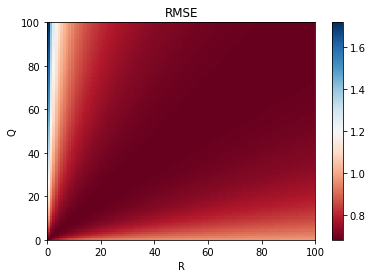

In [3]:
#Affichage RMSE
plt.pcolor(RMSE,cmap='RdBu')
plt.colorbar()
plt.xlabel('R')
plt.ylabel('Q')
plt.title('RMSE')

Affichage de la log-vraisemblance 

Text(0.5, 1.0, 'Log-vraisemblance')

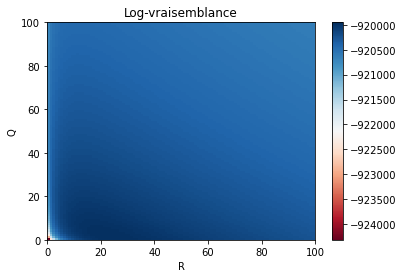

In [4]:
# Affichage de la log-vraisemblance
plt.figure()
plt.pcolor(LL,cmap='RdBu')
plt.colorbar()
plt.xlabel('R')
plt.ylabel('Q')
plt.title("Log-vraisemblance")


Affichage de la coverage probability

Text(0.5, 1.0, 'Coverage probability (50%)')

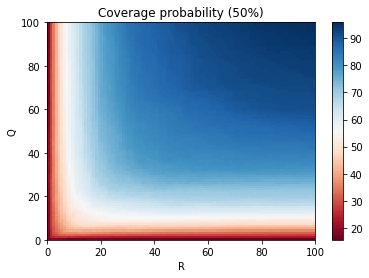

In [5]:
#Affichage de la coverage probability
plt.figure()
plt.pcolor(CP,cmap='RdBu')
plt.colorbar()
plt.xlabel('R')
plt.ylabel('Q')
plt.title("Coverage probability (50%)")
